In [1]:
.libPaths(R.home('/opt/homebrew/Caskroom/miniforge/base/lib/R/library'))
Output = '/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1013. Microbiome Peanut Allergy/P1013.3. Analyses/P1013.3.3. Volcano Plots/Output'
cur_date = '090625'

library(readxl)
library(openxlsx)
library(writexl)
library(tidyverse)
library(ggrepel)

# reading in files
bl_saliva_adj = data.frame(read_excel("Input/Saliva_Adj_Outcome_090625.xlsx"))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
head(bl_saliva_adj)

,Name,Name1,logFC,P.Value,P.Adj,Passed.Sensitivity.Analysis
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
1,k__Bacteria.__.__.__.__.__.__,Unidentified,0.29178065,0.462788934,0.85366752,TRUE
2,k__Bacteria.p__Absconditabacteria_.SR1..c__Absconditabacteria_.SR1._.C.1..o__Absconditabacteria_.SR1._.O.1..f__Absconditabacteria_.SR1._.F.1.,Absconditabacteria_.SR1._.G.1. bacterium_HMT_874,0.76969087,0.054463067,0.24508380,TRUE
3,k__Bacteria.p__Absconditabacteria_.SR1..c__Absconditabacteria_.SR1._.C.1..o__Absconditabacteria_.SR1._.O.1..f__Absconditabacteria_.SR1._.F.1.,Absconditabacteria_.SR1._.G.1. bacterium_HMT_875,12.06030124,1.000000000,1.00000000,TRUE
4,k__Bacteria.p__Actinobacteria.c__Actinomycetia.o__Actinomycetales.f__Actinomycetaceae,Actinomyces,0.07289551,0.882512576,1.00000000,TRUE
5,k__Bacteria.p__Actinobacteria.c__Actinomycetia.o__Actinomycetales.f__Actinomycetaceae,Actinomyces graevenitzii,-1.67165466,0.007295550,0.08535793,TRUE
6,k__Bacteria.p__Actinobacteria.c__Actinomycetia.o__Actinomycetales.f__Actinomycetaceae,Schaalia lingnae,-0.90445448,0.004158115,0.06644521,TRUE


Creating a volcano plot to visualize Name1s that were differentially expressed across tobacco use groups (exposure).??

In [3]:
get_significance = function(df){
    # adding a col to denote whether a Name1 had a significant p value, log FC, or both
    
    # add a column of NAs
    df$diffexpressed <- "No Significance"
    
    # if p adj is significant only
    df$diffexpressed[df$P.Adj < 0.1] <- "P Adjust Only"
    
    # if logFoldChange > log(1.5)? and p adj < 0.01, set as "significant" 
    df$diffexpressed[abs(df$logFC) > abs(log(1.5)) & df$P.Adj < 0.1] <- "P Adjust and log Fold Change"
    
    # making into a factor
    df$diffexpressed = factor(df$diffexpressed, levels = c("No Significance", "P Adjust Only", 
                                                                           "P Adjust and log Fold Change"))

    return(df)
}

# calling fn
test = get_significance(bl_saliva_adj)

In [4]:
head(test)

,Name,Name1,logFC,P.Value,P.Adj,Passed.Sensitivity.Analysis,diffexpressed
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<fct>
1,k__Bacteria.__.__.__.__.__.__,Unidentified,0.29178065,0.462788934,0.85366752,TRUE,No Significance
2,k__Bacteria.p__Absconditabacteria_.SR1..c__Absconditabacteria_.SR1._.C.1..o__Absconditabacteria_.SR1._.O.1..f__Absconditabacteria_.SR1._.F.1.,Absconditabacteria_.SR1._.G.1. bacterium_HMT_874,0.76969087,0.054463067,0.24508380,TRUE,No Significance
3,k__Bacteria.p__Absconditabacteria_.SR1..c__Absconditabacteria_.SR1._.C.1..o__Absconditabacteria_.SR1._.O.1..f__Absconditabacteria_.SR1._.F.1.,Absconditabacteria_.SR1._.G.1. bacterium_HMT_875,12.06030124,1.000000000,1.00000000,TRUE,No Significance
4,k__Bacteria.p__Actinobacteria.c__Actinomycetia.o__Actinomycetales.f__Actinomycetaceae,Actinomyces,0.07289551,0.882512576,1.00000000,TRUE,No Significance
5,k__Bacteria.p__Actinobacteria.c__Actinomycetia.o__Actinomycetales.f__Actinomycetaceae,Actinomyces graevenitzii,-1.67165466,0.007295550,0.08535793,TRUE,P Adjust and log Fold Change
6,k__Bacteria.p__Actinobacteria.c__Actinomycetia.o__Actinomycetales.f__Actinomycetaceae,Schaalia lingnae,-0.90445448,0.004158115,0.06644521,TRUE,P Adjust and log Fold Change


# Volcano Plot

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


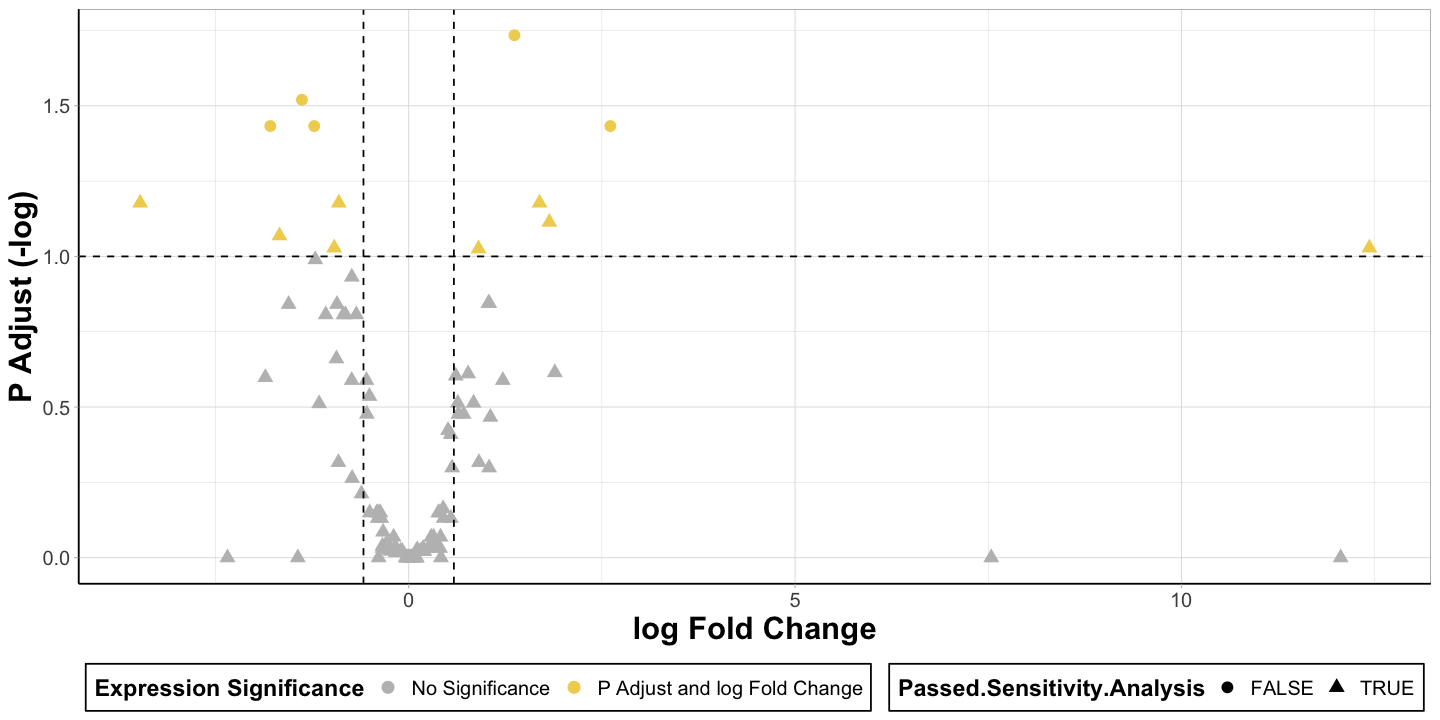

In [14]:
options(repr.plot.width=12, repr.plot.height=6) #changing size

ggplot() + 
  geom_point(data = test, aes(x = logFC, y = -log10(P.Adj), color = diffexpressed,
                             shape = Passed.Sensitivity.Analysis), size = 3) + 

  # P Value line
  geom_hline(yintercept = -log10(0.1), linetype = "dashed") + 
  # FC Line
  geom_vline(xintercept = log2(1.5), linetype = "dashed") +
  geom_vline(xintercept = -log2(1.5), linetype = "dashed") +

  # changing x limits of what is visible in the plot
  # xlim(-3, 3) + 
  # ylim(0, 3) + 

 #labeling points with statistical significance and FC
  # geom_label_repel(data = common_genes_df %>%
  #                 filter(logFC > log(1.5)), aes(x = logFC, y = -log10(P.Adjust), label = Name1, color = diffexpressed),
  #                 xlim = c(1.5, NA), hjust = 0, segment.size = 0.3, max.overlaps = Inf, size = 5, show.legend = FALSE, parse = TRUE) + 

  # geom_text_repel(data = noncommon_genes_df %>%
  #                 filter(logFC > log(1.5)), 
  #                 aes(x = logFC, y = -log10(P.Adjust), label = Name1, color = diffexpressed), xlim = c(1.3, NA), hjust = 0, 
  #                 segment.size = 0.3, box.padding = 0.9, max.overlaps = Inf, size = 5, show.legend = FALSE, parse = TRUE, nudge_y = -1.7) + 

  # geom_text_repel(data = noncommon_genes_df %>%
  #                 filter(logFC < -log(1.5)), 
  #                aes(x = logFC, y = -log10(P.Adjust), label = Name1, color = diffexpressed), xlim = c(-2, NA), hjust = 0.8, 
  #                segment.size = 0.3, box.padding = 0.9, max.overlaps = Inf, size = 5, show.legend = FALSE, parse = TRUE, nudge_y = 0.8) + 

  #facet_wrap(~Comparison, scales = 'free_x') + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", # changing legend position
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        # strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        # strip.text.y = element_text(size = 15, face = "bold")
       ) + #changes size of facet y axis 
  labs(x = 'log Fold Change', y = 'P Adjust (-log)') +

  scale_color_manual(name = "Expression Significance",
                      values = c("gray", '#F0D25E', "#005BEA"))